<a href="https://colab.research.google.com/github/kiwindow/PrognosisOfRejection/blob/master/3_Leave_One_Out_CV_program_binary_with_ardata7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 環境設定

## 0) ランタイムをGPUに設定

## 1) ランタイムに接続

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 2) データの準備 : df の定義にあるデータの場所を変更する (最終列がtarget)

In [ ]:
# モジュールの読み込み
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

# drive/My Drive/data/ の中にある ardata7 という csvファイルを読み込む
df = pd.read_csv('drive/My Drive/practice/data/ardata7.csv')
print('行と列の数')
print(df.shape)
print()
print('欠損データのセル数')
pd.set_option('display.max_rows', 1000)
df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


行と列の数
(51, 212)

欠損データのセル数


RMale                        0
Rage                         0
InfectionCount               0
FeverOnly                    0
Pyrexia                      0
Inflammation                 0
VirusInfection               0
CMV                          0
anemia                       0
HeartDisease                 0
RespiratoryInfection         0
UpperRespiratoryInfection    0
UpperDigestivetract          0
Diarrhea                     0
UTI                          0
WBCinUrine                   0
WBCpeakover10                0
urology                      0
Skin                         0
WoundInfection               0
HerpesZoster                 0
Orthopedics                  0
Ascites                      0
Surgery                      0
AerobicGPC                   0
AerobicGNR                   0
candida                      0
staphylococcusaureus         0
streptococcusaureus          0
enterobacteraerogenes        0
enterobactereclacue          0
enterococcusfaecalis         0
citobact

In [ ]:
# 欠損値を中央値で置換　df2: pandasデータ、data: numpyデータ
df2 = df.fillna(df.median())
data = df2.values

df2.isnull().sum()

RMale                        0
Rage                         0
InfectionCount               0
FeverOnly                    0
Pyrexia                      0
Inflammation                 0
VirusInfection               0
CMV                          0
anemia                       0
HeartDisease                 0
RespiratoryInfection         0
UpperRespiratoryInfection    0
UpperDigestivetract          0
Diarrhea                     0
UTI                          0
WBCinUrine                   0
WBCpeakover10                0
urology                      0
Skin                         0
WoundInfection               0
HerpesZoster                 0
Orthopedics                  0
Ascites                      0
Surgery                      0
AerobicGPC                   0
AerobicGNR                   0
candida                      0
staphylococcusaureus         0
streptococcusaureus          0
enterobacteraerogenes        0
enterobactereclacue          0
enterococcusfaecalis         0
citobact

In [ ]:
# データの切り分け
x = df2.iloc[:, :-1].values
t = df2.iloc[:, -1].values

# データの分類
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

行と列の数
(51, 212)

[[ 0.         37.          4.         ...  1.05       -0.48152822
   0.        ]
 [ 1.         66.          7.         ...  2.01       -0.46278072
   1.        ]
 [ 1.         62.          1.         ...  5.5        -0.69825448
   0.        ]
 ...
 [ 1.         29.          4.         ...  2.035       0.58015829
   0.        ]
 [ 1.         50.          1.         ...  2.035       0.53039126
   0.        ]
 [ 0.         45.          3.         ...  0.56        0.11566602
   0.        ]]

目的変数の分布


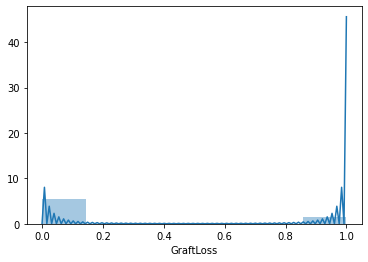

In [ ]:
# データの大きさ
print('行と列の数')
print(df2.shape)
print()
print(data)
df2.head()
# 分布の表示
print()
print('目的変数の分布')
sns.distplot(df2.iloc[:,-1].dropna())

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 212 entries, RMale to GraftLoss
dtypes: float64(23), int64(189)
memory usage: 84.6 KB


In [ ]:
df2.describe()

,RMale,Rage,InfectionCount,FeverOnly,Pyrexia,Inflammation,VirusInfection,CMV,anemia,HeartDisease,RespiratoryInfection,UpperRespiratoryInfection,UpperDigestivetract,Diarrhea,UTI,WBCinUrine,WBCpeakover10,urology,Skin,WoundInfection,HerpesZoster,Orthopedics,Ascites,Surgery,AerobicGPC,AerobicGNR,candida,staphylococcusaureus,streptococcusaureus,enterobacteraerogenes,enterobactereclacue,enterococcusfaecalis,citobacterdiversus,pseudomonas,inflammationdatefirst,infectiondatelast,asthma,pastanemia,infarctionhemohorrage,calcification,...,NS,hypoplastickidney,MalignantHypertention,Banfi,Banfｔ,Banfｇ,Banfｖ,Banfci,Banfct,Banfcv,Banfcg,Banfptc,Banfptcbm,Banfah,Banfaah,InterstitialHemorrhage,CellInvasion,lymphinvasion,thrombusformation,coaglationnecrosis,IgA.1,IgM,IgG,SABC1q,C3,C4d,C5b,bulbarsclerosis,CRPpreRej,CRPpostRej,WBCpeakover5,MaxCRP,WBCpreRej,WBCpostKTx,WBCpeakover9postRej,MaxWBC,MMFpostRej,MMFatRej,CNIpostRej,GraftLoss
count,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.666667,46.666667,4.843137,0.54902,0.117647,0.117647,0.490196,0.392157,0.431373,0.156863,0.215686,0.235294,0.196078,0.490196,2.392157,7.772784,2.352941,0.117647,0.098039,0.137255,0.078431,0.058824,0.176471,0.254902,0.372549,0.352941,0.058824,0.372549,0.039216,0.039216,0.078431,0.078431,0.039216,0.254902,6.274510,171.039216,0.039216,0.215686,0.058824,0.039216,...,0.117647,0.039216,0.039216,1.058824,1.254902,0.588235,0.411765,0.372549,0.372549,0.980392,0.058824,1.117647,0.176471,0.509804,0.098039,0.039216,1.156863,0.607843,0.058824,0.039216,0.137255,0.215686,0.058824,0.176471,0.078431,0.647059,0.058824,0.137255,0.412275,0.660075,2.705882,4.573725,0.822844,6.420745,20.901961,13.805294,2.867222,2.469706,0.030782,0.215686
std,0.476095,12.349359,3.258052,0.75667,0.381945,0.325396,0.504878,0.493089,0.500196,0.367290,0.415390,0.428403,0.400979,0.504878,2.173278,2.970686,2.037877,0.325396,0.300327,0.347540,0.271524,0.237635,0.385013,0.483452,0.488294,0.482640,0.237635,0.488294,0.196039,0.196039,0.271524,0.271524,0.196039,0.440143,7.189099,235.087385,0.196039,0.415390,0.237635,0.196039,...,0.325396,0.196039,0.196039,0.903588,1.055332,0.941838,0.725988,0.691687,0.691687,0.860005,0.237635,0.972565,0.477740,0.731370,0.360827,0.196039,0.857264,0.801958,0.237635,0.196039,0.347540,0.415390,0.237635,0.385013,0.271524,0.522438,0.237635,0.347540,0.753385,0.862803,6.546126,5.165955,0.942283,1.688243,26.501513,6.360069,1.479068,1.550337,1.286997,0.415390
min,0.000000,21.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.542000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042870,0.000000,0.040000,0.000000,3.076000,0.000000,4.040000,1.062500,0.540000,-0.947254,0.000000
25%,0.000000,36.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.00

## 3) Optuna と XGBoost のインストール

In [ ]:
!pip install optuna

     |████████████████████████████████| 235kB 2.7MB/s 
     |████████████████████████████████| 1.1MB 8.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 112kB 18.4MB/s 
     |████████████████████████████████| 133kB 17.4MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=120433e222e634316f36dc82aa449595351165d9613b33d81e09a422232d96c2
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-2.0.0-cp36-none-any.whl size=312964 sha256=65ddfd23345372b1cd0966622ee31a8d758b3d125aa7ce6b9f2b9ba4d92cab6e
  Stored in directory: /root/.cache/pip/wheels/b5/

In [ ]:
# XGBoostのインストール
!pip3 install xgboost
!pip3 install -q pydot
!pip3 install graphviz

# 2. 各種モデルにおけるLeave-One-Out関数

## 1) Simple Linear Regression ; ACU 0.498

In [ ]:
def linear():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import LeaveOneOut

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LinearRegression()

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat =  [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Simple Linear Regressionによる2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')


    return res

In [ ]:
linear()

■ Leave-One-Out Cross Validation を用いた Simple Linear Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.49773   Accuracy: 0.62745   R2: -2.04515

               Actual True  Actual False
Predict True             3            11
Predict False            8            29

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.49772727272727274, 0.6274509803921569, 0.21428571428571427,
       0.2727272727272727, 0.24, 0.725, list([[3, 11], [8, 29]]),
       -2.04515491157451], dtype=object)

## 2) Lasso Regression ; AUC 0.630

In [ ]:
def lasso(a):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import LeaveOneOut

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Lasso(alpha=a)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        	# 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, confmat, r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Lasso Regressionによる2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')

    return res

In [ ]:
lasso(0.1)

■ Leave-One-Out Cross Validation を用いた Lasso Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.66591   Accuracy: 0.72549   R2: -0.19725

               Actual True  Actual False
Predict True             2             5
Predict False            9            35

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.665909090909091, 0.7254901960784313, 0.2857142857142857,
       0.18181818181818182, 0.875, 0.2222222222222222,
       list([[2, 5], [9, 35]]), -0.19725016235878678], dtype=object)

In [ ]:
lasso(0.01)

■ Leave-One-Out Cross Validation を用いた Lasso Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.69318   Accuracy: 0.66667   R2: -0.72191

               Actual True  Actual False
Predict True             4            10
Predict False            7            30

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.6931818181818181, 0.6666666666666666, 0.2857142857142857,
       0.36363636363636365, 0.75, 0.32, list([[4, 10], [7, 30]]),
       -0.7219084222358687], dtype=object)

In [ ]:
lasso(10)

■ Leave-One-Out Cross Validation を用いた Lasso Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.43409   Accuracy: 0.76471   R2: -0.06329

               Actual True  Actual False
Predict True             0             1
Predict False           11            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.434090909090909, 0.7647058823529411, 0.0, 0.0, 0.975, 0.0,
       list([[0, 1], [11, 39]]), -0.06329137947570573], dtype=object)

### Optunaによる最適化

In [ ]:
def lassoOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import LeaveOneOut

    import optuna

    # 統計処理関数
    from sklearn.metrics import roc_auc_score

    alpha = trial.suggest_uniform('alpha', 0.01, 1)

    x = []
    t = []
    # 予測値
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)
    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Lasso(alpha=alpha)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])
     
    # AUC
    auc = roc_auc_score(t, pred)

    res = auc
    # 1 - AUCを最小化する
    return 1/res


def lassoTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(lassoOptuna, n_trials)
    # 結果の確認
    print()
    print('ハイパーパラメータ：', study.best_params)
    print('AUC：', 1/study.best_value)    

In [ ]:
lassoTrial(100)

[I 2020-08-14 23:52:12,212] Trial 0 finished with value: 1.7254901960784312 and parameters: {'alpha': 0.46002110421654596}. Best is trial 0 with value: 1.7254901960784312.
[I 2020-08-14 23:52:12,305] Trial 1 finished with value: 1.7741935483870965 and parameters: {'alpha': 0.19620158848650615}. Best is trial 0 with value: 1.7254901960784312.
[I 2020-08-14 23:52:12,366] Trial 2 finished with value: 1.8487394957983199 and parameters: {'alpha': 0.9816253250590934}. Best is trial 0 with value: 1.7254901960784312.
[I 2020-08-14 23:52:12,429] Trial 3 finished with value: 1.7322834645669292 and parameters: {'alpha': 0.45596107011024073}. Best is trial 0 with value: 1.7254901960784312.
[I 2020-08-14 23:52:12,488] Trial 4 finished with value: 1.6988416988416988 and parameters: {'alpha': 0.7803604041791388}. Best is trial 4 with value: 1.6988416988416988.
[I 2020-08-14 23:52:12,575] Trial 5 finished with value: 1.7600000000000002 and parameters: {'alpha': 0.8770694765315559}. Best is trial 4 wit


ハイパーパラメータ： {'alpha': 0.044621949786456956}
AUC： 0.734090909090909


In [ ]:
lasso(0.044621949786456956)

■ Leave-One-Out Cross Validation を用いた Lasso Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.73409   Accuracy: 0.72549   R2: -0.15536

               Actual True  Actual False
Predict True             3             6
Predict False            8            34

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.734090909090909, 0.7254901960784313, 0.3333333333333333,
       0.2727272727272727, 0.3, 0.85, list([[3, 6], [8, 34]]),
       -0.15536206766665317], dtype=object)

## 3) Ridge Regression ; AUC 0.630

In [ ]:
def ridge(a):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import LeaveOneOut

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Ridge(alpha=a)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, confmat, r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Ridge Regressionによる2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')    
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')

    return res

In [ ]:
ridge(1)

■ Leave-One-Out Cross Validation を用いた Ridge Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.51818   Accuracy: 0.62745   R2: -1.91292

               Actual True  Actual False
Predict True             3            11
Predict False            8            29

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5181818181818182, 0.6274509803921569, 0.21428571428571427,
       0.2727272727272727, 0.725, 0.24, list([[3, 11], [8, 29]]),
       -1.9129247728164027], dtype=object)

In [ ]:
ridge(100)

■ Leave-One-Out Cross Validation を用いた Ridge Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.62727   Accuracy: 0.70588   R2: -0.46392

               Actual True  Actual False
Predict True             3             7
Predict False            8            33

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.6272727272727272, 0.7058823529411765, 0.3, 0.2727272727272727,
       0.825, 0.2857142857142857, list([[3, 7], [8, 33]]),
       -0.4639196454021983], dtype=object)

In [ ]:
ridge(1000)

■ Leave-One-Out Cross Validation を用いた Ridge Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.59091   Accuracy: 0.72549   R2: -0.21508

               Actual True  Actual False
Predict True             2             5
Predict False            9            35

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5909090909090909, 0.7254901960784313, 0.2857142857142857,
       0.18181818181818182, 0.875, 0.2222222222222222,
       list([[2, 5], [9, 35]]), -0.2150790729071388], dtype=object)

In [ ]:
ridge(0.1)

■ Leave-One-Out Cross Validation を用いた Ridge Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.5   Accuracy: 0.62745   R2: -2.02895

               Actual True  Actual False
Predict True             3            11
Predict False            8            29

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.49999999999999994, 0.6274509803921569, 0.21428571428571427,
       0.2727272727272727, 0.725, 0.24, list([[3, 11], [8, 29]]),
       -2.0289511181637043], dtype=object)

### Optunaによる最適化

In [ ]:
def ridgeOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import LeaveOneOut

    import optuna

    # 統計処理関数
    from sklearn.metrics import roc_auc_score

    alpha = trial.suggest_uniform('alpha', 1, 1000)

    x = []
    t = []
    # 予測値
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Ridge(alpha=alpha)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    res = auc
    # 1/AUC　を最小化する
    return 1/res


def ridgeTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(ridgeOptuna, n_trials)
    # 結果の確認
    print()
    print('ハイパーパラメータ：', study.best_params)
    print('AUC：', 1/study.best_value)
    print()
    return study.best_params['alpha']    

In [ ]:
ridgeTrial(100)

[I 2020-08-15 00:58:52,611] Trial 0 finished with value: 1.6176470588235292 and parameters: {'alpha': 151.7553746431721}. Best is trial 0 with value: 1.6176470588235292.
[I 2020-08-15 00:58:52,668] Trial 1 finished with value: 1.6236162361623618 and parameters: {'alpha': 268.94869245635016}. Best is trial 0 with value: 1.6176470588235292.
[I 2020-08-15 00:58:52,720] Trial 2 finished with value: 1.673003802281369 and parameters: {'alpha': 542.2035891115144}. Best is trial 0 with value: 1.6176470588235292.
[I 2020-08-15 00:58:52,774] Trial 3 finished with value: 1.6793893129770991 and parameters: {'alpha': 836.0860755549314}. Best is trial 0 with value: 1.6176470588235292.
[I 2020-08-15 00:58:52,829] Trial 4 finished with value: 1.673003802281369 and parameters: {'alpha': 542.526987082231}. Best is trial 0 with value: 1.6176470588235292.
[I 2020-08-15 00:58:52,884] Trial 5 finished with value: 1.6923076923076923 and parameters: {'alpha': 951.2751175327176}. Best is trial 0 with value: 1.


ハイパーパラメータ： {'alpha': 72.36359228628783}
AUC： 0.6295454545454545



72.36359228628783

In [ ]:
ridge(72.36359228628783)

■ Leave-One-Out Cross Validation を用いた Ridge Regressionによる2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.62955   Accuracy: 0.72549   R2: -0.54453

               Actual True  Actual False
Predict True             3             6
Predict False            8            34

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.6295454545454545, 0.7254901960784313, 0.3333333333333333,
       0.2727272727272727, 0.85, 0.3, list([[3, 6], [8, 34]]),
       -0.5445313463324897], dtype=object)

## 4) Logistic Regression ; AUC 0.553


In [ ]:
# MaxMinによるNormalizationのスケーリング

def logisticN():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import MinMaxScaler

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LogisticRegression()


    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 


    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)
    
    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2]  )

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Logistic Regression　(Normalized) による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')

    return res




# 平均と標準偏差によるStandardizationのスケーリング

def logisticS():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import StandardScaler

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = StandardScaler() 
    scaler.fit(x)  
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LogisticRegression()



    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 
       
    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

 
    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2]  )

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Logistic Regression (Standardized) による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')

    return res

In [ ]:
logisticN()

■ Leave-One-Out Cross Validation を用いた Logistic Regression　(Normalized) による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.55341   Accuracy: 0.76471   R2: -0.39091

               Actual True  Actual False
Predict True             2             3
Predict False            9            37

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.553409090909091, 0.7647058823529411, 0.4, 0.18181818181818182,
       0.925, 0.25, list([[2, 3], [9, 37]]), -0.3909090909090913],
      dtype=object)

In [ ]:
logisticS()

■ Leave-One-Out Cross Validation を用いた Logistic Regression (Standardized) による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.52045   Accuracy: 0.76471   R2: -0.39091

               Actual True  Actual False
Predict True             1             2
Predict False           10            38

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5204545454545454, 0.7647058823529411, 0.3333333333333333,
       0.09090909090909091, 0.95, 0.14285714285714285,
       list([[1, 2], [10, 38]]), -0.3909090909090913], dtype=object)

## 5) Support Vector Machine ; AUC 0.500

In [ ]:
# 正規化

def SVMn():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import MinMaxScaler

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    svm = SVC()


    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        svm.fit(x_train, t_train)
        result = svm.predict(x_test)
        pred.append(result[0])


        	# 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'


    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Support Vector Machine (Normalized)による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')

    return res


# 標準化

def SVMs():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import StandardScaler

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score    

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = StandardScaler() 
    scaler.fit(x)  
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    svm = SVC()



    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        svm.fit(x_train, t_train)
        result = svm.predict(x_test)
        pred.append(result[0])

        	# 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 
  
    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Support Vector Machine (Standardized)による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')

    return res

In [ ]:
SVMn()

■ Leave-One-Out Cross Validation を用いた Support Vector Machine (Normalized)による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.5   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             0             0
Predict False           11            40

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5, 0.7843137254901961, 'N/A', 0.0, 1.0, 0.0,
       list([[0, 0], [11, 40]]), -0.27500000000000036], dtype=object)

In [ ]:
SVMs()

■ Leave-One-Out Cross Validation を用いた Support Vector Machine (Standardized)による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.5   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             0             0
Predict False           11            40

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5, 0.7843137254901961, 'N/A', 0.0, 1.0, 0.0,
       list([[0, 0], [11, 40]]), -0.27500000000000036], dtype=object)

## 6) Random Forest ; AUC 0.545

In [ ]:
def randomF(random_state):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state=random_state)
  

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Random Forest による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
#    print('')
#    from pprint import pprint
#    print('◆ The defalut settings of the hyperparameters')
#    pprint(rf.get_params())  
    # n_estimators, max_features should be optimized first
    # then, max_depth, min_sample_split, min_samples_leaf, bootstrap
    print('')

    return res

In [ ]:
randomF(1)

■ Leave-One-Out Cross Validation を用いた Random Forest による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.53295   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5329545454545453, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.975, 0.15384615384615385, list([[1, 1], [10, 39]]),
       -0.27500000000000036], dtype=object)

### RandomizedSearchCV & GridSearchCVによる最適化

#### A. RandomSearch

In [ ]:
def RandomSearch(variables, label):
    from sklearn.model_selection import RandomizedSearchCV
    from pprint import pprint

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}

    print('◆　Random Hypterparameter Grid')
    pprint(random_grid)
    print('')

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(variables, label)
    print('')
    print('◆　Best Parameters using RandomizedSearchCV')
    pprint(rf_random.best_params_)

In [ ]:
RandomSearch(x, t)

◆　Random Hypterparameter Grid
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished



◆　Best Parameters using RandomizedSearchCV
{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}


#### B. GridSearch

In [ ]:
 def GridSearch(variables, label):
    from sklearn.model_selection import GridSearchCV
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True],
        'max_depth': [20,30,40],
        'max_features': ['sqrt'],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [4,5,6],
        'n_estimators': [300,400,500]
    }
    # Create a based model
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search.fit(variables, label)
    print('')
    print('◆　Best Parameters using GridSearchCV')
    pprint(grid_search.best_params_)    

In [ ]:
GridSearch(x, t)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.0min finished



◆　Best Parameters using GridSearchCV
{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}


In [ ]:
def randomforest(random_state, bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []
    # 予測値
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state=random_state,
                                bootstrap = True,
                                max_depth = 20,
                                max_features = 'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 4,
                                n_estimators = 300
                                )
  

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/practice/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2])

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた Random Forest による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')
    from pprint import pprint
    print('◆ The settings of the hyperparameters')
    pprint(rf.get_params())  
    # n_estimators, max_features should be optimized first
    # then, max_depth, min_sample_split, min_samples_leaf, bootstrap
    print('')

    return res

In [ ]:
randomforest(41, True, 20, 'sqrt', 1, 4, 300)

■ Leave-One-Out Cross Validation を用いた Random Forest による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.53295   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数

◆ The settings of the hyperparameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 41,
 'verbose': 0,
 'warm_start': False}



array([0.5329545454545453, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.975, 0.15384615384615385, list([[1, 1], [10, 39]]),
       -0.27500000000000036], dtype=object)

In [ ]:
randomforest(625, False, 20, 'sqrt', 1, 4, 300)

■ Leave-One-Out Cross Validation を用いた Random Forest による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.53295   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数

◆ The settings of the hyperparameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 625,
 'verbose': 0,
 'warm_start': False}



array([0.5329545454545453, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.975, 0.15384615384615385, list([[1, 1], [10, 39]]),
       -0.27500000000000036], dtype=object)

### Optunaによる最適化

In [ ]:
def randomFOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut
    import optuna
    from sklearn.metrics import roc_auc_score

    random_state = trial.suggest_int('random_state', 1, 2000)

    x = []
    t = []
    # 予測値
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state = random_state)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    # 1/AUCを最小値にする
    return 1/auc


def randomFTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(randomFOptuna, n_trials)
    # 結果の確認
    print()
    print('ハイパーパラメータ：', study.best_params)
    print('AUC：', 1/study.best_value)
    print()
    return study.best_params['random_state']    

In [ ]:
randomFTrial(100)

[I 2020-08-15 07:11:53,753] Trial 0 finished with value: 1.8333333333333335 and parameters: {'random_state': 987}. Best is trial 0 with value: 1.8333333333333335.
[I 2020-08-15 07:12:00,635] Trial 1 finished with value: 1.921397379912664 and parameters: {'random_state': 400}. Best is trial 0 with value: 1.8333333333333335.
[I 2020-08-15 07:12:07,515] Trial 2 finished with value: 1.8333333333333335 and parameters: {'random_state': 423}. Best is trial 0 with value: 1.8333333333333335.
[I 2020-08-15 07:12:14,377] Trial 3 finished with value: 1.8763326226012798 and parameters: {'random_state': 482}. Best is trial 0 with value: 1.8333333333333335.
[I 2020-08-15 07:12:21,272] Trial 4 finished with value: 2.0512820512820515 and parameters: {'random_state': 240}. Best is trial 0 with value: 1.8333333333333335.
[I 2020-08-15 07:12:28,140] Trial 5 finished with value: 1.8763326226012798 and parameters: {'random_state': 855}. Best is trial 0 with value: 1.8333333333333335.
[I 2020-08-15 07:12:34,


ハイパーパラメータ： {'random_state': 987}
AUC： 0.5454545454545454



987

In [ ]:
randomF(987)

■ Leave-One-Out Cross Validation を用いた Random Forest による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.54545   Accuracy: 0.80392   R2: -0.15909

               Actual True  Actual False
Predict True             1             0
Predict False           10            40

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5454545454545454, 0.803921568627451, 1.0, 0.09090909090909091,
       1.0, 0.16666666666666666, list([[1, 0], [10, 40]]),
       -0.1590909090909094], dtype=object)

## 7) XGBoost ; AUC 0.668

In [ ]:
def xgboost(eta):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    import xgboost as xgb

    # 統計処理関数
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # 端数処理
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []
    # 予測値
    round = []
    pred = []
    pairs = []
    
    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)


    # Hypter-parameterの設定
    params = {
        'objective' : 'binary:logistic',
        'silent' : 0,
        'eta' : eta,
        'random_state' : 71,
        'max_depth' : 5,
        'eval_metric' : 'logloss'
    }

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        # データをxgboostのデータ構造に変換
        d_train = xgb.DMatrix(x_train, label=t_train)
        d_test = xgb.DMatrix(x_test, label=t_test)
        # 学習
        model = xgb.train(params, d_train)
        result = model.predict(d_test)
        pred.append(result[0])


        # 予測値のカテゴリー
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # 決定係数
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)    

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]


    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, spec, f1, [[TP, FP], [FN, TN]], r2]  )

    # 出力　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. 混合行列, 8. LOOにおける決定係数)

    print('■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果')
    print('')
    print('全データのサンプル数: ' + str(len(x_train) + len(x_test)) )  
    print('学習データのサンプル数: ' + str(len(x_train)) + '     説明変数: ' + str(x_train.shape) + '   目的変数: ' + str(t_train.shape))
    print('検証データのサンプル数: ' + str(len(x_test)) + '     説明変数: ' + str(x_test.shape) + '   目的変数: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数')
    print('')


    return res


In [ ]:
xgboost(0.1)

■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.64091   Accuracy: 0.72549   R2: -0.03556

               Actual True  Actual False
Predict True             1             4
Predict False           10            36

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.640909090909091, 0.7254901960784313, 0.2, 0.09090909090909091,
       0.9, 0.125, list([[1, 4], [10, 36]]), -0.03556390450401259],
      dtype=object)

In [ ]:
xgboost(0.3)

■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.57273   Accuracy: 0.76471   R2: -0.11337

               Actual True  Actual False
Predict True             1             2
Predict False           10            38

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5727272727272728, 0.7647058823529411, 0.3333333333333333,
       0.09090909090909091, 0.95, 0.14285714285714285,
       list([[1, 2], [10, 38]]), -0.11337225409718865], dtype=object)

In [ ]:
xgboost(0.2)

■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.675   Accuracy: 0.78431   R2: 2e-05

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.675, 0.7843137254901961, 0.5, 0.09090909090909091, 0.975,
       0.15384615384615385, list([[1, 1], [10, 39]]),
       1.922716373370381e-05], dtype=object)

In [ ]:
xgboost(0.911)

■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.59091   Accuracy: 0.76471   R2: -0.19333

               Actual True  Actual False
Predict True             2             3
Predict False            9            37

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.5909090909090908, 0.7647058823529411, 0.4, 0.18181818181818182,
       0.925, 0.25, list([[2, 3], [9, 37]]), -0.1933297138660992],
      dtype=object)

### Optunaによる最適化

In [ ]:
def xgboostOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    import xgboost as xgb

    import optuna

    # 統計処理関数
    from sklearn.metrics import roc_auc_score

    eta = trial.suggest_uniform('eta', 0, 1)

    x = []
    t = []

    round = []
    pred = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)


    # Hypter-parameterの設定
    params = {
        'objective' : 'binary:logistic',
        'silent' : 0,
        'eta' : eta,
        'random_state' : 71,
        'max_depth' : 5,
        'eval_metric' : 'logloss'
    }

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        # データをxgboostのデータ構造に変換
        d_train = xgb.DMatrix(x_train, label=t_train)
        d_test = xgb.DMatrix(x_test, label=t_test)
        # 学習
        model = xgb.train(params, d_train)
        result = model.predict(d_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    res = auc
    # 1/AUCを最小化する
    return 1/res


def xgboostTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(xgboostOptuna, n_trials)

    # 結果の確認
    print()
    print('ハイパーパラメータ：', study.best_params)
    print('AUC：', 1/study.best_value) 

In [ ]:
xgboostTrial(100)

[I 2020-08-15 07:48:17,275] Trial 0 finished with value: 0.4363636363636363 and parameters: {'eta': 0.5353917805980927}. Best is trial 0 with value: 0.4363636363636363.
[I 2020-08-15 07:48:17,844] Trial 1 finished with value: 0.415909090909091 and parameters: {'eta': 0.5702360197024607}. Best is trial 1 with value: 0.415909090909091.
[I 2020-08-15 07:48:18,429] Trial 2 finished with value: 0.4431818181818181 and parameters: {'eta': 0.06290432248253464}. Best is trial 1 with value: 0.415909090909091.
[I 2020-08-15 07:48:18,958] Trial 3 finished with value: 0.47272727272727266 and parameters: {'eta': 0.7294186853779531}. Best is trial 1 with value: 0.415909090909091.
[I 2020-08-15 07:48:19,529] Trial 4 finished with value: 0.36590909090909085 and parameters: {'eta': 0.5128044744984028}. Best is trial 4 with value: 0.36590909090909085.
[I 2020-08-15 07:48:20,099] Trial 5 finished with value: 0.3931818181818182 and parameters: {'eta': 0.49831810683977584}. Best is trial 4 with value: 0.365


ハイパーパラメータ： {'eta': 0.20026109486077817}
AUC： 0.6681818181818182


In [ ]:
xgboost(0.20026109486077817)

■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.66818   Accuracy: 0.78431   R2: -0.00608

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.6681818181818182, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.975, 0.15384615384615385, list([[1, 1], [10, 39]]),
       -0.006080435441389698], dtype=object)

In [ ]:
xgboostTrial(100)

[I 2020-08-15 07:52:08,905] Trial 0 finished with value: 1.6923076923076925 and parameters: {'eta': 0.8583446972601617}. Best is trial 0 with value: 1.6923076923076925.
[I 2020-08-15 07:52:09,445] Trial 1 finished with value: 1.7120622568093384 and parameters: {'eta': 0.7558828704504963}. Best is trial 0 with value: 1.6923076923076925.
[I 2020-08-15 07:52:10,027] Trial 2 finished with value: 1.6666666666666667 and parameters: {'eta': 0.31487676157119815}. Best is trial 2 with value: 1.6666666666666667.
[I 2020-08-15 07:52:10,583] Trial 3 finished with value: 1.6988416988416988 and parameters: {'eta': 0.6070987848618855}. Best is trial 2 with value: 1.6666666666666667.
[I 2020-08-15 07:52:11,109] Trial 4 finished with value: 1.6666666666666667 and parameters: {'eta': 0.9831297924927819}. Best is trial 2 with value: 1.6666666666666667.
[I 2020-08-15 07:52:11,668] Trial 5 finished with value: 1.7600000000000002 and parameters: {'eta': 0.6542449444252876}. Best is trial 2 with value: 1.666


ハイパーパラメータ： {'eta': 0.1995986835927192}
AUC： 0.6681818181818182


In [ ]:
xgboost(0.1995986835927192)

■ Leave-One-Out Cross Validation を用いた XGBoost による2値分類の検定結果

全データのサンプル数: 51
学習データのサンプル数: 50     説明変数: (50, 211)   目的変数: (50,)
検証データのサンプル数: 1     説明変数: (1, 211)   目的変数: (1,)

AUC: 0.66818   Accuracy: 0.78431   R2: 0.00155

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

出力の内容: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. 混合行列 8. LOOにおける決定係数



array([0.6681818181818182, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.975, 0.15384615384615385, list([[1, 1], [10, 39]]),
       0.0015452152460351254], dtype=object)

## 8) Symbolic Regression ; AUC 0.784

- AUC 0.784
- Accuracy 82.35%
- Precision 60.0%
- Recall 54.55%
- Sepcificity 90.0%
- F1-measure 57.14
- C-statistics 0.7841

In [ ]:
                 Actual True   Actual False
Predicted True       6              4
Predicted False      5             36 

### ROC

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

df = pd.read_csv('drive/My Drive/program/data/cstatSR.csv')
pred = df.iloc[:,1].values
obsd = df.iloc[:,0].values
roc_auc_score(obsd,pred)

0.784090909090909